# Evaluation Of Duet Benchmarking Results from Distributed Database "Cassandra"

### Imports

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

### Import Benchmarking Measurements as csv file and create Pandas Dataframe for further Analysis

In [20]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", "1mCops_3t", "run_measurements2.csv")
print(filepath)
df = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\1mCops_3t\run_measurements2.csv


### Insert latencies in ms into the measurement table

In [21]:
df["latency_ms"] = (df["received"]- df["sent"])/1000000

In [22]:
df["sent_ms"] = df["sent"].div(1000000)
df["received_ms"] = df["received"].div(1000000)

In [23]:
df.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,4.999995e+05,4.109407e+12,4.109416e+12,8.502735e+00,4.109407e+06,4.109416e+06
std,2.886752e+05,2.857577e+11,2.857590e+11,2.034804e+01,2.857577e+05,2.857590e+05
min,0.000000e+00,3.665404e+12,3.665421e+12,5.911000e-01,3.665404e+06,3.665421e+06
25%,2.499998e+05,3.818919e+12,3.818924e+12,1.216466e+00,3.818919e+06,3.818924e+06
50%,4.999995e+05,4.088687e+12,4.088692e+12,1.773292e+00,4.088687e+06,4.088692e+06
75%,7.499992e+05,4.362758e+12,4.362784e+12,3.276360e+00,4.362758e+06,4.362784e+06
max,9.999990e+05,4.650442e+12,4.650443e+12,3.944949e+02,4.650442e+06,4.650443e+06


### Restructure Timeline

In [24]:
firstSent = df["sent"].min()
df["sent_sec"] = (df["sent"] - firstSent)/1000000/1000

### Create Function to prune Measurements

In [25]:
def pruneMeasurements(dataframe): 
    print("Hello from the other side")
    
pruneMeasurements(df)


Hello from the other side


### Create subsets of dataframe (for Version A and B, and for each worker for Version A and B) 

In [26]:
dfA1 = df.loc[(df["workerId"] == "w1-vA")]
dfA2 = df.loc[(df["workerId"] == "w2-vA")]
dfA3 = df.loc[(df["workerId"] == "w3-vA")]
dfB1 = df.loc[(df["workerId"] == "w1-vB")]
dfB2 = df.loc[(df["workerId"] == "w2-vB")]
dfB3 = df.loc[(df["workerId"] == "w3-vB")]
dfA = df.loc[(df["workerId"] == "w1-vA") | (df["workerId"] == "w2-vA") | (df["workerId"] == "w3-vA")]
dfB = df.loc[(df["workerId"] == "w1-vB") | (df["workerId"] == "w2-vB") | (df["workerId"] == "w3-vB")]

### Return benchmark run time (First request send to last response received)

In [27]:
totalTime = df["received"].max() - df["sent"].min()
print(totalTime/1000000/1000/60, "minuten")

16.41731188495 minuten


In [28]:
dfA.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,499999.500000,4.110863e+12,4.110871e+12,8.508580,4.110863e+06,4.110871e+06,445.458365
std,288675.278932,2.858226e+11,2.858239e+11,20.342648,2.858226e+05,2.858239e+05,285.822607
min,0.000000,3.665404e+12,3.665452e+12,0.622959,3.665404e+06,3.665452e+06,0.000000
25%,249999.750000,3.820442e+12,3.820445e+12,1.215704,3.820442e+06,3.820445e+06,155.037892
50%,499999.500000,4.090528e+12,4.090541e+12,1.770671,4.090528e+06,4.090541e+06,425.123495
75%,749999.250000,4.364576e+12,4.364586e+12,3.245763,4.364576e+06,4.364586e+06,699.171486
max,999999.000000,4.650021e+12,4.650022e+12,288.295393,4.650021e+06,4.650022e+06,984.616981


In [29]:
dfB.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,499999.500000,4.107952e+12,4.107960e+12,8.496889,4.107952e+06,4.107960e+06,442.547665
std,288675.278932,2.856856e+11,2.856869e+11,20.353438,2.856856e+05,2.856869e+05,285.685557
min,0.000000,3.665405e+12,3.665421e+12,0.591100,3.665405e+06,3.665421e+06,0.000512
25%,249999.750000,3.817491e+12,3.817499e+12,1.217210,3.817491e+06,3.817499e+06,152.086869
50%,499999.500000,4.086818e+12,4.086822e+12,1.775933,4.086818e+06,4.086822e+06,421.413468
75%,749999.250000,4.360913e+12,4.360925e+12,3.308458,4.360913e+06,4.360925e+06,695.508849
max,999999.000000,4.650442e+12,4.650443e+12,394.494888,4.650442e+06,4.650443e+06,985.037296


### Min. Latencies for Worker 2 (A & B)

In [30]:
dfA3.loc[dfA3["latency_ms"].idxmin()]

workerId                  w3-vA
queryType                SELECT
queryId                   98537
sent              3880498964541
received          3880499596796
target-region           unknown
latency_ms             0.632255
sent_ms          3880498.964541
received_ms      3880499.596796
sent_sec             215.094632
Name: 1532397, dtype: object

In [31]:
dfB1.loc[dfB1["latency_ms"].idxmin()]

workerId                  w1-vB
queryType                SELECT
queryId                  166578
sent              4081089479708
received          4081090070808
target-region           unknown
latency_ms               0.5911
sent_ms          4081089.479708
received_ms      4081090.070808
sent_sec             415.685148
Name: 334154, dtype: object

### Some checks

#### Time difference in ms when first query was sent by worker-1 to Version A and B 

In [32]:

dfA2["sent"].min() - dfB2["sent"].min()

-511996

#### Time difference in ms when last query was sent by worker-1 to Version A and B 

In [33]:
dfA1["sent"].max() - dfB1["sent"].max() 


-3992860681

## Create Figures 

### Create Boxplots

In [34]:
sns.set_theme(style="darkgrid")

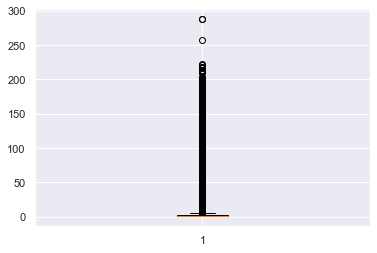

In [35]:
ax = plt.boxplot(x=dfA["latency_ms"])


### Create Flowchart

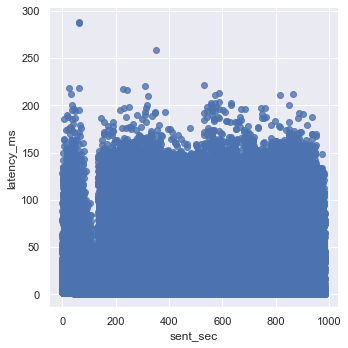

In [36]:
sns.lmplot(x='sent_sec', y='latency_ms', data=dfA, fit_reg=False)